**TO PREDICT**

*What will be the predicted score if a student studies for 9.25 hrs a day?*

AUTHOR:- **HARSHIT SHUKLA**

#IMPORT LIBRARIES

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Load Dataset

In [ ]:
path = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(path)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
df.shape

(25, 2)

## Discover and Visualize the data to gain insights

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


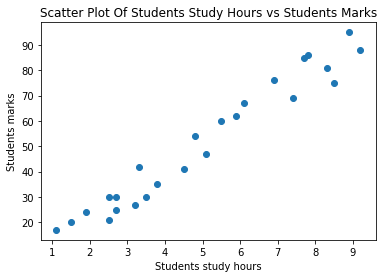

In [ ]:
plt.scatter(x = df.Hours, y = df.Scores)
plt.xlabel("Students study hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot Of Students Study Hours vs Students Marks")
plt.show()



## Prepare the data for Machine Learning Algorithms

In [ ]:
# Data Cleaning

In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
df.mean()

Hours      5.012
Scores    51.480
dtype: float64

In [ ]:
df2 = df.fillna(df.mean())

In [ ]:
df2.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
df2.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
# split dataset

In [ ]:
x= df2.drop("Scores", axis = "columns")
y= df2.drop("Hours", axis = "columns")
print("shape of x= ", x.shape)
print("shape of y= ", y.shape)

shape of x=  (25, 1)
shape of y=  (25, 1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=51)
print("shape of x_train= ", x_train.shape)
print("shape of y_train= ", y_train.shape)
print("shape of x_test= ", x_test.shape)
print("shape of y_test= ", y_test.shape)

shape of x_train=  (20, 1)
shape of y_train=  (20, 1)
shape of x_test=  (5, 1)
shape of y_test=  (5, 1)


## Select a model and train it

In [ ]:
# y = m * x + c
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.coef_

array([[9.56433743]])

In [ ]:
lr.intercept_

array([2.70197068])

In [ ]:
m = 9.56
c = 2.70
y = m * 4 + c
y

40.940000000000005

In [ ]:
lr.predict([[4]])[0][0].round(2)

40.96

In [ ]:
y_pred = lr.predict(x_test)
y_pred

array([[55.30582657],
       [76.34736893],
       [68.69589898],
       [82.08597139],
       [28.52568176]])

In [ ]:
pd.DataFrame(np.c_[x_test, y_test, y_pred], columns = ["Hours", "Scores_original", "Scores_predicted"])

,Hours,Scores_original,Scores_predicted
0,5.5,60.0,55.305827
1,7.7,85.0,76.347369
2,6.9,76.0,68.695899
3,8.3,81.0,82.085971
4,2.7,30.0,28.525682


## Fine-tune your model

In [ ]:
lr.score(x_test,y_test)

0.9238518102278781

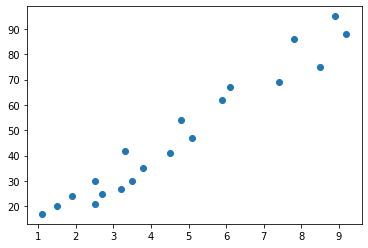

In [ ]:
plt.scatter(x_train,y_train)

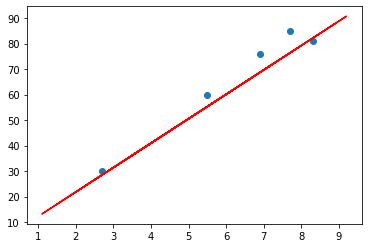

In [ ]:
plt.scatter(x_test, y_test)
plt.plot(x_train, lr.predict(x_train), color = "r")

## Present Your Solution

## Save ML MODEL

In [ ]:
import joblib
joblib.dump(lr, "students_mark_predictor_model.pkl")

['students_mark_predictor_model.pkl']

In [ ]:
model = joblib.load("students_mark_predictor_model.pkl")

In [ ]:
model.predict([[6]])[0][0]

60.087995291006145

## Output for the 9.25 hrs

In [57]:
model.predict([[9.25]])[0][0].round(2)

91.17